# 1. Perform data quality checks by checking for missing values, if any.

In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv('HR_comma_sep.csv')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.shape

(14999, 10)

In [5]:
data.isnull().sum() # No missing values

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [7]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

# 2. Understand what factors contributed most to employee turnover at EDA.
## 2.1 Draw a heatmap of the correlation matrix between all numerical features or columns in the data.

<Axes: >

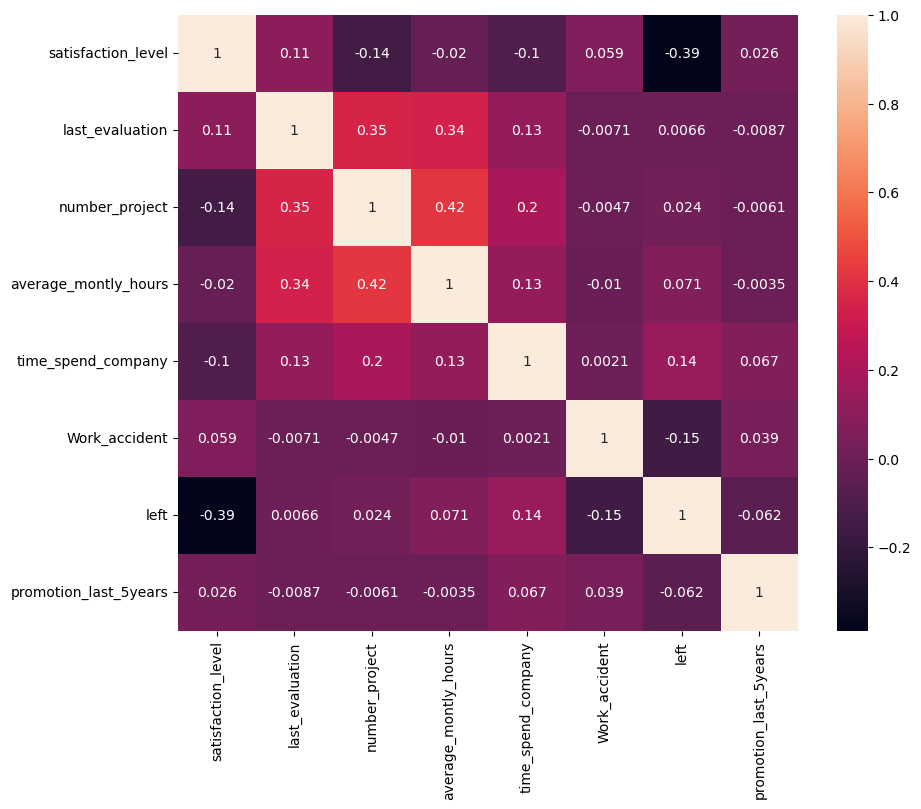

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
corr_features = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years']
sns.heatmap(data[corr_features].corr(), annot=True)

## 2.2 Draw the distribution plot of:
### Employee Satisfaction (use column satisfaction_level)

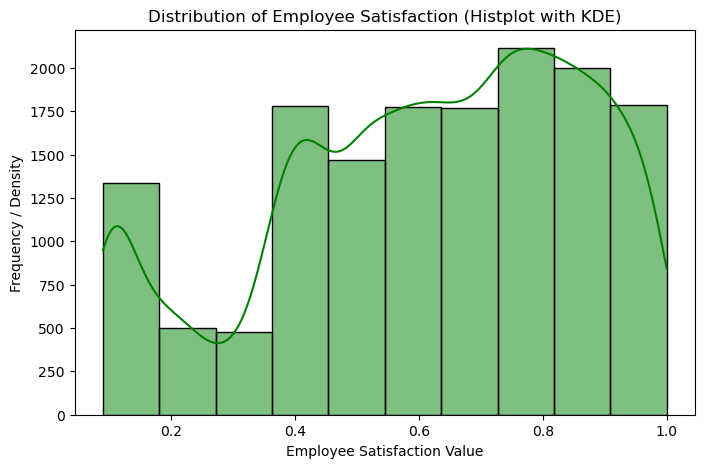

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(data.satisfaction_level, bins=10, kde=True, color='green')
plt.title('Distribution of Employee Satisfaction (Histplot with KDE)')
plt.xlabel('Employee Satisfaction Value')
plt.ylabel('Frequency / Density')
plt.show()

### Employee Evaluation (use column last_evaluation)

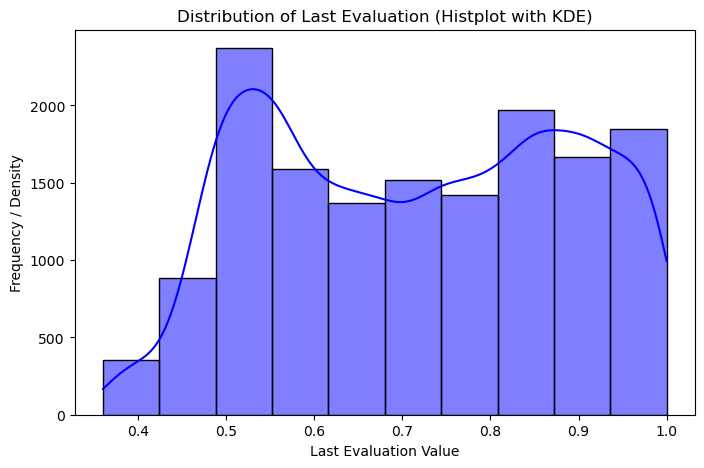

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(data.last_evaluation, bins=10, kde=True, color='blue')
plt.title('Distribution of Last Evaluation (Histplot with KDE)')
plt.xlabel('Last Evaluation Value')
plt.ylabel('Frequency / Density')
plt.show()

### Employee Average Monthly Hours (use column average_montly_hours)

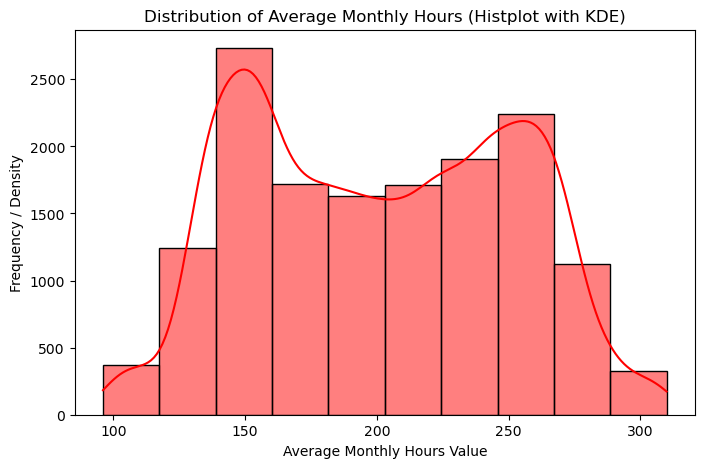

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(data.average_montly_hours, bins=10, kde=True, color='red')
plt.title('Distribution of Average Monthly Hours (Histplot with KDE)')
plt.xlabel('Average Monthly Hours Value')
plt.ylabel('Frequency / Density')
plt.show()

## 2.3 Draw the bar plot of the employee project count of both employees who left and stayed in the organization (use column number_project and hue column left), and give your inferences from the plot.

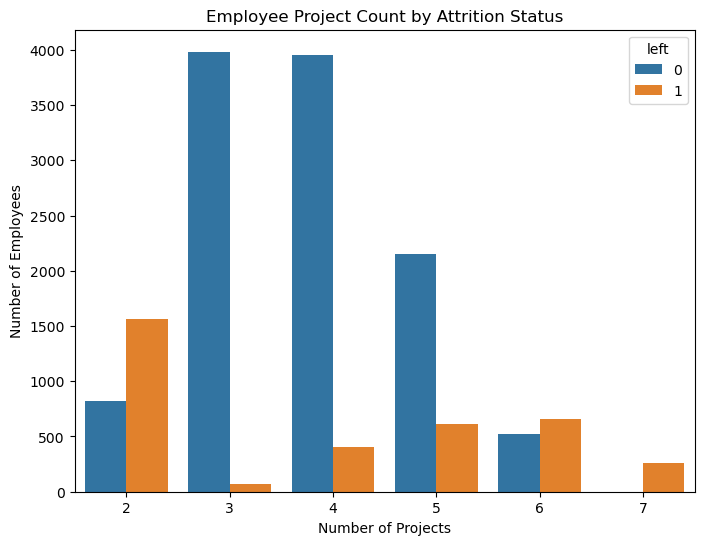

In [12]:
plt.figure(figsize=(8, 6)) 
sns.countplot(x="number_project", hue="left", data=data) 

plt.title("Employee Project Count by Attrition Status")
plt.xlabel("Number of Projects")
plt.ylabel("Number of Employees")

plt.show()

### Inferences
• With 2, 6 and 7 projects, more employees left the company than those who stayed

• Majority of the employees who did not leave the company had 3, 4 and 5 projects

• All of the employees with 7 projects left the company

• In general, there is an increase in employee turnover rate as project count increases (from 3 onwards)

# 3. Perform clustering of employees who left based on their satisfaction and evaluation.

## 3.1.	Choose columns satisfaction_level, last_evaluation, and left.

In [13]:
data_clustering = data[['satisfaction_level', 'last_evaluation', 'left']].copy()

In [14]:
data_clustering # the columns are normalized 

,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1
...,...,...,...
14994,0.40,0.57,1
14995,0.37,0.48,1
14996,0.37,0.53,1
14997,0.11,0.96,1


In [15]:
data_clustering.isnull().sum() # the columns have no null values

satisfaction_level    0
last_evaluation       0
left                  0
dtype: int64

In [16]:
data_clustering['left'].value_counts() # 'Left' is unbalanced data

left
0    11428
1     3571
Name: count, dtype: int64

In [17]:
data_clustering.shape

(14999, 3)

## 3.2.	Do K-means clustering of employees who left the company into 3 clusters

In [18]:
from sklearn.cluster import KMeans

In [19]:
kmeans = KMeans(n_clusters=3, random_state=2, n_init=10)
kmeans.fit(data_clustering[data_clustering.left==1][["satisfaction_level","last_evaluation"]])

KMeans(n_clusters=3, n_init=10, random_state=2)

In [20]:
kmeans.cluster_centers_

array([[0.80851586, 0.91170931],
       [0.41014545, 0.51698182],
       [0.11115466, 0.86930085]])

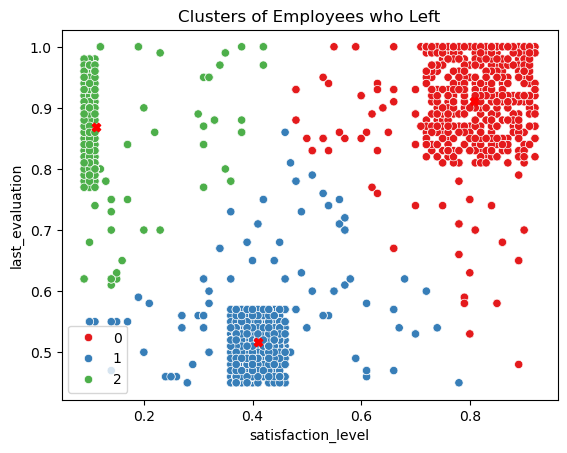

In [21]:
sns.scatterplot(x = 'satisfaction_level', y = 'last_evaluation', data = data_clustering[data_clustering.left==1], hue = kmeans.labels_, palette='Set1')

plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="red",marker="X")
plt.title("Clusters of Employees who Left")

plt.show();

## 3.3 Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.

There are 3 distinct clusters for employees who left the company

Cluster 1 (Hard-working and Happy Employee): Satisfaction between 0.7~1.0 and evaluations were greater than 0.8. The employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance. They probably left because they found a more rewarding job opportunity.

Cluster 2 (Bad and Sad Employee): Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work. They were probably fired due to under performance.

Cluster 3 (Hard-working and Sad Employee): Satisfaction was below 0.2 and evaluations were greater than 0.75. This could be a good indication that employees who left the company were good workers but felt horrible at their job. They probably left as they were overworked.

# 4.Handle the left Class Imbalance using the SMOTE technique.

## 4.1. Pre-process the data by converting categorical columns to numerical columns by:

### Separating categorical variables and numeric variables

In [22]:
data.info() # 8 numeric and 2 categorical variables, left is dependent variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [23]:
data['sales'].value_counts()

sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [24]:
data.rename(columns={'sales':'department'},inplace=True)
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [25]:
data['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

### Applying get_dummies() to the categorical variables

In [26]:
department = pd.get_dummies(data['department'], prefix='department', prefix_sep='_', drop_first=True)
department

,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,True,False
14995,False,False,False,False,False,False,False,True,False
14996,False,False,False,False,False,False,False,True,False
14997,False,False,False,False,False,False,False,True,False


In [27]:
salary =  pd.get_dummies(data['salary'], prefix='salary', prefix_sep='_', drop_first=True)
salary

,salary_low,salary_medium
0,True,False
1,False,True
2,False,True
3,True,False
4,True,False
...,...,...
14994,True,False
14995,True,False
14996,True,False
14997,True,False


### Combining categorical variables and numeric variables

In [28]:
data = data.drop(['department','salary'],axis=1)

In [29]:
data = pd.concat([data,department,salary], axis=1)
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14995,0.37,0.48,2,160,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14996,0.37,0.53,2,143,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14997,0.11,0.96,6,280,4,0,1,0,False,False,False,False,False,False,False,True,False,True,False


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      14999 non-null  float64
 1   last_evaluation         14999 non-null  float64
 2   number_project          14999 non-null  int64  
 3   average_montly_hours    14999 non-null  int64  
 4   time_spend_company      14999 non-null  int64  
 5   Work_accident           14999 non-null  int64  
 6   left                    14999 non-null  int64  
 7   promotion_last_5years   14999 non-null  int64  
 8   department_RandD        14999 non-null  bool   
 9   department_accounting   14999 non-null  bool   
 10  department_hr           14999 non-null  bool   
 11  department_management   14999 non-null  bool   
 12  department_marketing    14999 non-null  bool   
 13  department_product_mng  14999 non-null  bool   
 14  department_sales        14999 non-null

## 4.2 Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.

In [31]:
X = data.drop(['left'],axis=1)
y = data['left']

In [32]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (14999, 18)
y shape: (14999,)


In [33]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [34]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

print("y_train values:",y_train.value_counts())  
print("y_test values:",y_test.value_counts())

X_train shape: (11999, 18)
y_train shape: (11999,)
X_test shape: (3000, 18)
y_test shape: (3000,)
y_train values: left
0    9142
1    2857
Name: count, dtype: int64
y_test values: left
0    2286
1     714
Name: count, dtype: int64


## 4.3 Upsample the train dataset using the SMOTE technique from the imblearn module.

In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=12, sampling_strategy = 1.0)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [36]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (14999, 18)
y shape: (14999,)


In [37]:
print("X_smote shape:",X_smote.shape)
print("y_smote shape:",y_smote.shape)

X_smote shape: (18284, 18)
y_smote shape: (18284,)


In [38]:
print("y_train values:",y_train.value_counts()) 
print("y_smote values:",y_smote.value_counts()) 

y_train values: left
0    9142
1    2857
Name: count, dtype: int64
y_smote values: left
0    9142
1    9142
Name: count, dtype: int64


# 5.Perform 5-fold cross-validation model training and evaluate performance.

## 5.1 Train a logistic regression model, apply a 5-fold CV, and plot the classification report.

In [39]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state = 42, max_iter=1000)
model_lr.fit(X_smote, y_smote)
y_pred_lr = model_lr.predict(X_test)

In [40]:
lr_result = cross_val_score(model_lr, X_smote, y_smote, cv=5, scoring='f1')
lr_result.mean()

0.7978723094753583

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      2286
           1       0.51      0.75      0.60       714

    accuracy                           0.77      3000
   macro avg       0.71      0.76      0.72      3000
weighted avg       0.81      0.77      0.78      3000



## 5.2 Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report.

In [42]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state = 42)
model_rf.fit(X_smote, y_smote)
y_pred_rf = model_rf.predict(X_test)

In [43]:
rf_result = cross_val_score(model_rf, X_smote, y_smote, cv=5, scoring='f1')
rf_result.mean()

0.9835635532336017

In [44]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.98      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.98      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



## 5.3 Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report.

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier(random_state = 42)
model_gb.fit(X_smote, y_smote)
y_pred_gb = model_gb.predict(X_test)

In [46]:
gb_result = cross_val_score(model_gb, X_smote, y_smote, cv=5, scoring='f1')
gb_result.mean()

0.962362284298526

In [47]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2286
           1       0.92      0.94      0.93       714

    accuracy                           0.97      3000
   macro avg       0.95      0.96      0.95      3000
weighted avg       0.97      0.97      0.97      3000



# 6. Identify the best model and justify the evaluation metrics used.

## 6.1 Find the ROC/AUC for each model and plot the ROC curve.

In [48]:
from sklearn.metrics import roc_curve, auc

#Logistic Regression
y_scores_lr = model_lr.predict_proba(X_test)[:,1]
fpr_lr , tpr_lr , thresholds_lr = roc_curve(y_test , y_scores_lr)
print("AUC of Logistic Regression model is", auc(fpr_lr,tpr_lr))

#Random Forest Classifier
y_scores_rf = model_rf.predict_proba(X_test)[:,1]
fpr_rf , tpr_rf , thresholds_rf = roc_curve(y_test , y_scores_rf)
print("AUC of Random Forest Classifier model is", auc(fpr_rf,tpr_rf))

#Gradient Boosting Classifier
y_scores_gb = model_gb.predict_proba(X_test)[:,1]
fpr_gb , tpr_gb , thresholds_gb = roc_curve(y_test , y_scores_gb)
print("AUC of Gradient Boosting Classifier model is", auc(fpr_gb,tpr_gb))

AUC of Logistic Regression model is 0.8162852192495547
AUC of Random Forest Classifier model is 0.9956200327900189
AUC of Gradient Boosting Classifier model is 0.9859705036870392


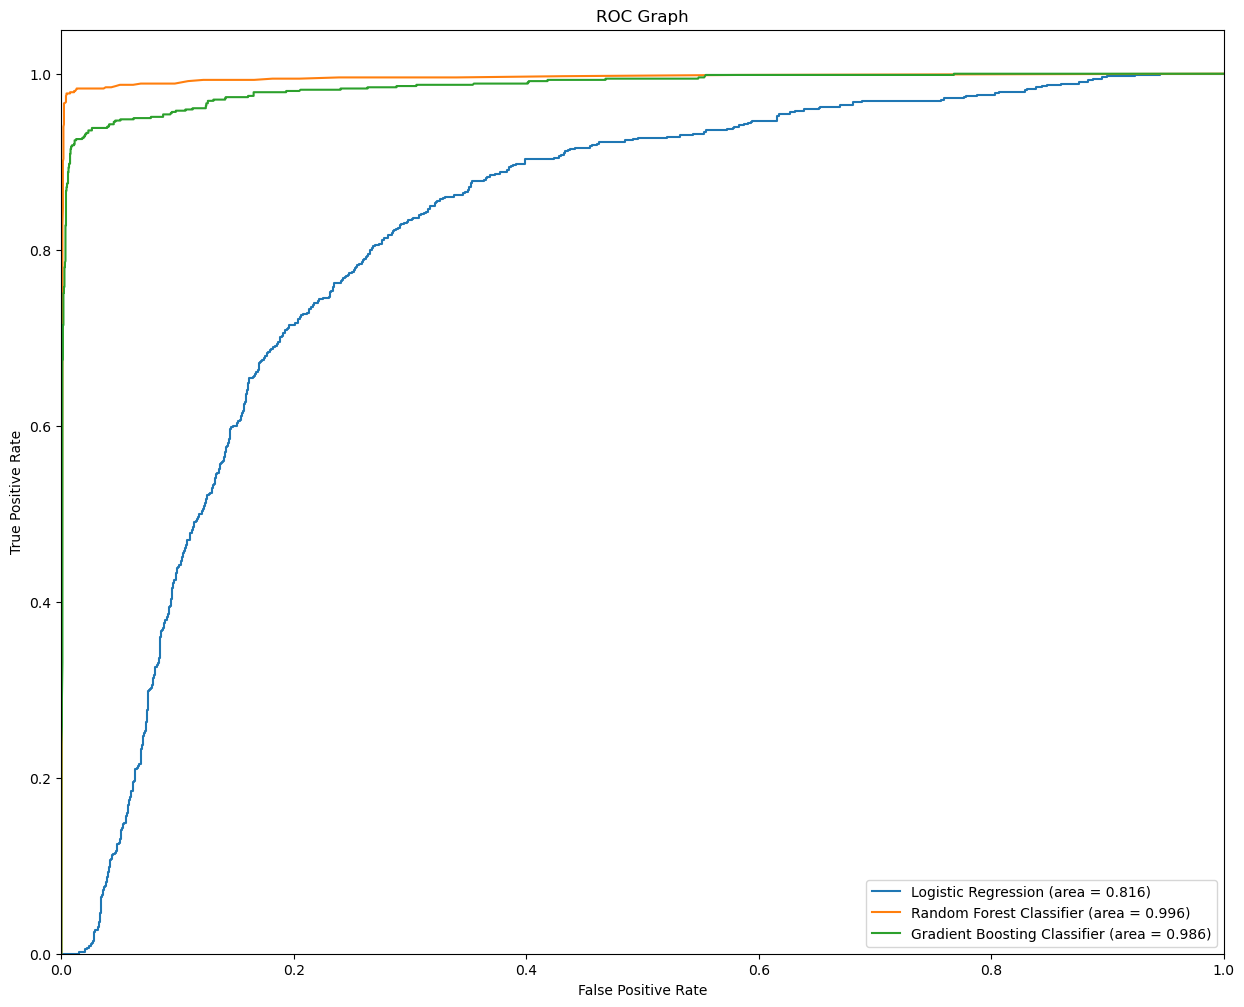

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
plt.plot(fpr_lr , tpr_lr , label='Logistic Regression (area = %0.3f)' % auc(fpr_lr,tpr_lr))
plt.plot(fpr_rf , tpr_rf , label='Random Forest Classifier (area = %0.3f)' % auc(fpr_rf,tpr_rf))
plt.plot(fpr_gb , tpr_gb , label='Gradient Boosting Classifier (area = %0.3f)' % auc(fpr_gb,tpr_gb))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show();

## 6.2 Find the confusion matrix for each of the models.

[[1767  519]
 [ 182  532]]
Recall 0.7450980392156863 and Precision 0.5061845861084682 for Logistic Regression model


<Axes: >

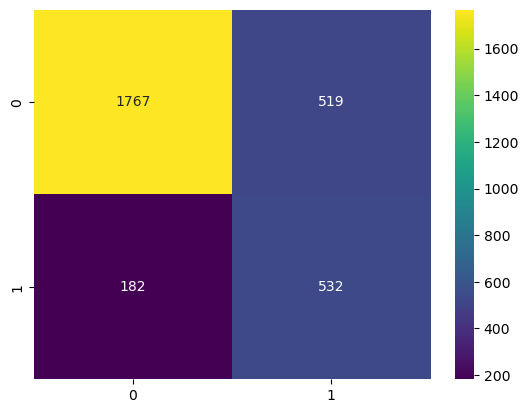

In [50]:
# Logistic Regression
from sklearn.metrics import confusion_matrix, recall_score, precision_score
cm = confusion_matrix(y_test, y_pred_lr)
print (cm)
print(f"Recall {recall_score(y_test, y_pred_lr)} and Precision {precision_score(y_test, y_pred_lr)} for Logistic Regression model")
sns.heatmap(cm, annot = True, fmt = 'g', cmap = 'viridis')

[[2269   17]
 [  15  699]]
Recall 0.9789915966386554 and Precision 0.9762569832402235 for Random Forest model


<Axes: >

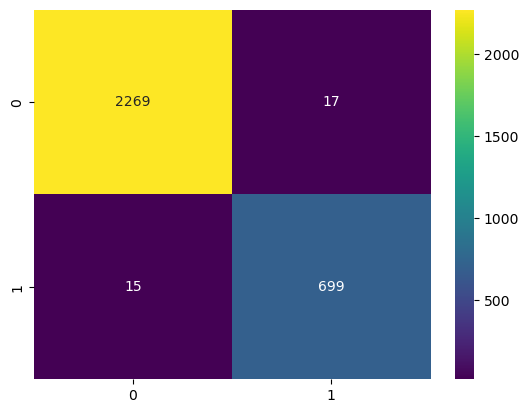

In [51]:
# Random Forest Classifier
cm = confusion_matrix(y_test, y_pred_rf)
print (cm)
print(f"Recall {recall_score(y_test, y_pred_rf)} and Precision {precision_score(y_test, y_pred_rf)} for Random Forest model")
sns.heatmap(cm, annot = True, fmt = 'g', cmap = 'viridis')

[[2229   57]
 [  46  668]]
Recall 0.9355742296918768 and Precision 0.9213793103448276 for Gradient Boosting Classifier model


<Axes: >

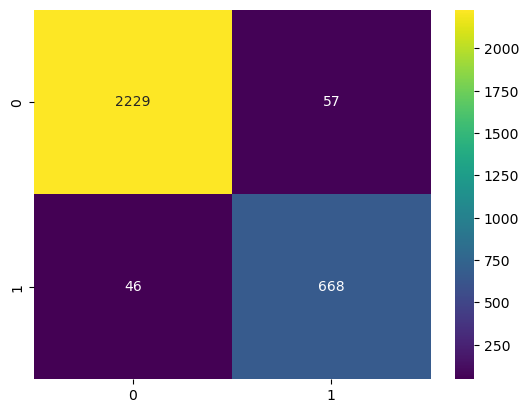

In [52]:
# Gradient Boosting Classifer
cm = confusion_matrix(y_test, y_pred_gb)
print (cm)
print(f"Recall {recall_score(y_test, y_pred_gb)} and Precision {precision_score(y_test, y_pred_gb)} for Gradient Boosting Classifier model")
sns.heatmap(cm, annot = True, fmt = 'g', cmap = 'viridis')

## 6.3 Explain which metric needs to be used from the confusion matrix: Recall or Precision?

Consider that an employee is given treatment by Human Resources because they think the employee will leave the company within a month, but the employee actually does not. This is a False Positive. This mistake could be expensive, inconvenient, and time consuming for both the Human Resources and employee, but is a good investment for relational growth.

Compare this with the opposite error, where Human Resources does not give treatment/incentives to the employees and they do leave. This is a False Negative. This type of error is more detrimental because the company would lose an employee, which could lead to great setbacks and more money to rehire.

We want our machine learn model to capture as much of the minority class as possible (employees who are leaving). Our objective is to catch ALL of the highly probable leaving employees at the risk of flagging some low-risk non-leaving employees.

We will limit False Negatives even if it increases False Positives. Thus we will prioritize Recall over Precision. 

# 7. Suggest various retention strategies for targeted employees.

## 7.1 Using the best model, predict the probability of employee turnover in the test data.

In [53]:
# Random Forest Classifier model is the best. 
 
# Probabilities for class 0 (employee is not leaving)
prob_class_0 = model_rf.predict_proba(X_test)[:, 0]
print(prob_class_0)

# Probabilities for class 1 (employee is leaving)
prob_class_1 = model_rf.predict_proba(X_test)[:, 1]
print(prob_class_1)

[1.   0.32 0.93 ... 0.95 0.97 0.01]
[0.   0.68 0.07 ... 0.05 0.03 0.99]


## 7.2 Based on the probability score range below, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.

In [56]:
import numpy as np 
# Safe Zone (Green) (Score <= 20%)
safe_zone_indices = np.where(prob_class_1 <= 0.2)

# Get the corresponding samples and their predicted probabilities
safe_zone_samples = X_test.iloc[safe_zone_indices]
safe_zone_probs = prob_class_1[safe_zone_indices]

safe_zone_samples_copy = safe_zone_samples.copy()
safe_zone_samples_copy["prob"]=safe_zone_probs
safe_zone_samples_copy.shape

(2189, 19)

In [57]:
# Low Risk Zone (Yellow) (20% < Score <= 60%)
low_risk_zone_indices = np.where((0.2 < prob_class_1) & (prob_class_1 <= 0.6))

# Get the corresponding samples and their predicted probabilities
low_risk_zone_samples = X_test.iloc[low_risk_zone_indices]
low_risk_zone_probs = prob_class_1[low_risk_zone_indices]

low_risk_zone_samples_copy = low_risk_zone_samples.copy()
low_risk_zone_samples_copy["prob"]=low_risk_zone_probs
low_risk_zone_samples_copy.shape

(103, 19)

In [58]:
# Medium Risk Zone (Orange) (60% < Score <= 90%)
medium_risk_zone_indices = np.where((0.6 < prob_class_1) & (prob_class_1 <= 0.9))

# Get the corresponding samples and their predicted probabilities
medium_risk_zone_samples = X_test.iloc[medium_risk_zone_indices]
medium_risk_zone_probs = prob_class_1[medium_risk_zone_indices]

medium_risk_zone_samples_copy = medium_risk_zone_samples.copy()
medium_risk_zone_samples_copy["prob"]=medium_risk_zone_probs
medium_risk_zone_samples_copy.shape

(56, 19)

In [59]:
# High Risk Zone (Red) (Score > 90%)
high_risk_zone_indices = np.where(prob_class_1 > 0.9)

# Get the corresponding samples and their predicted probabilities
high_risk_zone_samples = X_test.iloc[high_risk_zone_indices]
high_risk_zone_probs = prob_class_1[high_risk_zone_indices]

high_risk_zone_samples_copy = high_risk_zone_samples.copy()
high_risk_zone_samples_copy["prob"]=high_risk_zone_probs
high_risk_zone_samples_copy.shape

(652, 19)

### Safe Zone (Green) (Score <= 20%)

- No Action required

### Low-Risk Zone (Yellow) (20% < Score <= 60%)

- Action to be taken on long term basis
- Apply group interventions
- HR to track demographic data for these individuals to see if the risk profiles are changing or if the equation needs to be altered

### Medium-Risk Zone (Orange) (60% < Score <= 90%)

- Action to be taken on medium term basis
- HR to keep a close watch on the behavioral status to change from "Medium" to "High" risk. HR to analyze demographic data to identify high risk supervisors and point them to the BU heads
- Apply group interventions

### High-Risk Zone (Red) (Score > 90%)

- Action to be taken on immediate basis
- HR to send list to the concerned managers for immediate acion
- HR to validate the risks for consistency with the identified clusters
- Managers to have one to one conversation with the identified employee